In [8]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns
plt.style.use('classic')
from matplotlib.backends.backend_pdf import PdfPages

% matplotlib inline
%load_ext autoreload
% autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
pre_IE50 = pd.read_pickle('/data/ana_pre_IE50Hz_reci')
pre_IE50_uni = pd.read_pickle('/data/ana_pre_IE50Hz_uni')

In [3]:
pre_IE50_uni

,Before,After,File name,elimi
0,"{'ave_amp1': [[5.68476578538e-11], [7.45159758...","{'ave_amp1': [[6.23432533056e-11], [5.94223867...",2016072704,50
1,"{'ave_amp1': [[1.42224837347e-11], [1.22472488...","{'ave_amp1': [[1.11218275045e-11], [1.22465824...",2017021501,32
2,"{'ave_amp1': [[5.86400229671e-11], [5.17263879...","{'ave_amp1': [[5.11370040594e-11], [4.87416342...",2016091403,30
3,"{'ave_amp1': [[3.42060895077e-11], [3.78376990...","{'ave_amp1': [[3.86477072928e-11], [3.04041543...",2017062202,50


In [4]:
pre_IE50

,Before,After,File name,elimi
0,"{'ave_amp1': [[5.68476578538e-11], [7.45159758...","{'ave_amp1': [[6.23432533056e-11], [5.94223867...",2016072704,45.0
1,"{'ave_amp1': [[1.42224837347e-11], [1.22472488...","{'ave_amp1': [[1.11218275045e-11], [1.22465824...",2017021501,12.0
2,"{'ave_amp1': [[5.86400229671e-11], [5.17263879...","{'ave_amp1': [[5.11370040594e-11], [4.87416342...",2016091403,17.5
3,"{'ave_amp1': [[3.42060895077e-11], [3.78376990...","{'ave_amp1': [[3.86477072928e-11], [3.04041543...",2017062202,33.0
4,"{'ave_amp1': [[nan], [nan], [nan], [nan], [nan...","{'ave_amp1': [[5.15066646924e-11], [5.55679047...",2016072902,50.0
5,"{'ave_amp1': [[8.67642586693e-12], [9.44589884...","{'ave_amp1': [[nan], [1.14973767216e-11], [1.0...",2017021501,45.0
6,"{'ave_amp1': [[1.04873792918e-11], [1.24278900...","{'ave_amp1': [[1.57942963456e-11], [1.47588224...",2016092601,32.0
7,"{'ave_amp1': [[1.34764265807e-10], [1.40731204...","{'ave_amp1': [[1.24417153201e-10], [1.32735676...",2016091502,20.0
8,"{'ave_amp1': [[6.872697909e-11], [6.5993311303...","{'ave_amp1': [[7.43084679591e-11], [6.88233121...",2017052201,30.0


/src/Patch_ana/Patch_ana/patch_pip.py:465: RuntimeWarning: Mean of empty slice
  bef_mean = np.nanmean(bef_resp)
/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:3858: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/src/Patch_ana/Patch_ana/patch_pip.py:489: RuntimeWarning: Mean of empty slice
  ave_ptl_mean = np.nanmean(ave_ptl_resp_rm, axis=0)
/usr/local/lib/python3.5/dist-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


<Container object of 3 artists>

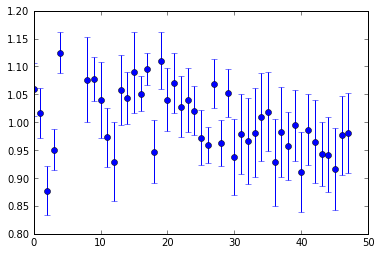

In [5]:
ave_ptl_resp = np.ones((len(pre_IE50), 60))*np.nan

ave_ptl_mean_2,ave_ptl_ste_2,ave_ptl_2  = patch_pip.samp_ave(pre_IE50, ave_ptl_resp)
ave_ptl_mean_2 = ave_ptl_mean_2[:-12]
ave_ptl_ste_2 = ave_ptl_ste_2[:-12]
ave_ptl_2 = ave_ptl_2[:, :-12]

plt.errorbar(x=np.arange(len(ave_ptl_mean_2)), y=ave_ptl_mean_2, yerr=ave_ptl_ste_2, fmt='bo')

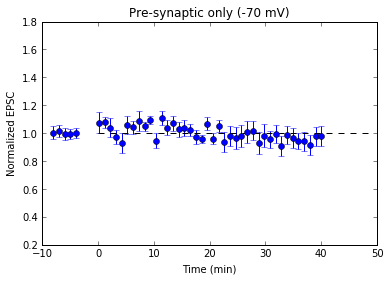

In [13]:
ave_ptl_mean_2cp, ave_ptl_ste_2cp =  ave_ptl_mean_2, ave_ptl_ste_2
ave_ptl_mean, ave_ptl_ste = patch_pip.pro_bef(ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5])
ave_ptl_mean_2cp[:5], ave_ptl_ste_2cp[:5] = ave_ptl_mean, ave_ptl_ste 
plt.errorbar(x=np.linspace(-6 * 4/3, len(ave_ptl_mean_2cp) - 6 * 4/3, len(ave_ptl_mean_2cp)), y=ave_ptl_mean_2cp, yerr=ave_ptl_ste_2cp, fmt='bo', label='2Hz (n={a})'.format(a=len(pre_IE50)))

plt.plot(np.ones((50))*1, 'k--')
plt.xlabel('Time (min)')
plt.ylabel('Normalized EPSC')
# plt.legend()
plt.ylim([0.2, 1.8])
plt.title('Pre-synaptic only (-70 mV)')

with PdfPages('/data/Figure5_1.pdf') as pdf:
    pdf.savefig()

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app
/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:4: RuntimeWarning: Mean of empty slice


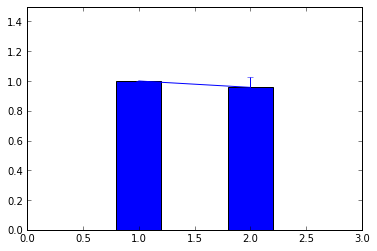

In [14]:
# Compare amplitude
mean_amp_aft_2Hz = np.nanmean(np.nanmean(ave_ptl_2[:, -10:], axis=1))

std_amp_aft_2Hz = np.nanstd(np.nanmean(ave_ptl_2[:, -10:], axis=1))/np.sqrt(6)
plt.bar([1,2], [1, mean_amp_aft_2Hz], align='center', width=0.4)
plt.errorbar(x=[1,2], y=[1, mean_amp_aft_2Hz],yerr = [0, std_amp_aft_2Hz], fmt='')
plt.ylim([0,1.5])
plt.xlim([0,3])
with PdfPages('/data/Figure5_2.pdf') as pdf:
    pdf.savefig()

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:2: RuntimeWarning: Mean of empty slice
  from ipykernel import kernelapp as app


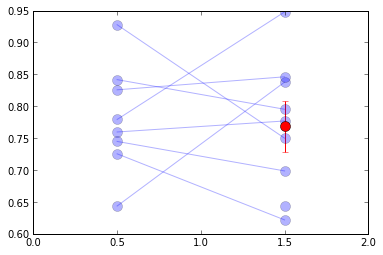

In [16]:
# Compare PPR
mean_PPR_bef = [np.nanmean(pre_IE50['Before'].loc[i]['PPR']) for i in pre_IE50['Before'].index]
mean_PPR_aft = [np.nanmean(pre_IE50['After'].loc[i]['PPR'][-10:]) for i in pre_IE50['After'].index]

mean_PPR_ave_bef = np.mean(mean_PPR_bef)
mean_PPR_std_bef = np.std(mean_PPR_bef)/np.sqrt(6)
mean_PPR_ave_aft = np.mean(mean_PPR_aft)
mean_PPR_std_aft = np.std(mean_PPR_aft)/np.sqrt(6)

for i, j in zip(mean_PPR_bef, mean_PPR_aft):
    plt.plot([0.5,1.5], [i, j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_PPR_ave_bef, mean_PPR_ave_aft], [mean_PPR_std_bef, mean_PPR_std_aft], fmt='r-o', markersize=10)
plt.xlim([0,2])
with PdfPages('/data/Supp2_1.pdf') as pdf:
    pdf.savefig()

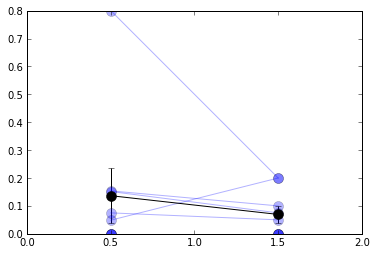

In [20]:
# Compare failure rate
mean_fail_bef = [np.sum(pre_IE50['Before'].loc[i]['failure'])/len(pre_IE50['Before'].loc[i]['failure']) for i in pre_IE50['Before'].index]
mean_fail_aft = [np.sum(pre_IE50['After'].loc[i]['failure'][-40:])/40 for i in pre_IE50['After'].index]

mean_fail_ave_bef = np.mean(mean_fail_bef)
mean_fail_std_bef = np.std(mean_fail_bef)/np.sqrt(6)
mean_fail_ave_aft = np.mean(mean_fail_aft)
mean_fail_std_aft = np.std(mean_fail_aft)/np.sqrt(6)

for i, j in zip(mean_fail_bef, mean_fail_aft):
    plt.plot([0.5,1.5], [i, j], 'bo-', alpha=0.3, markersize=10)
plt.errorbar([0.5,1.5], [mean_fail_ave_bef, mean_fail_ave_aft], [mean_fail_std_bef, mean_fail_std_aft], fmt='k-o', markersize=10)

plt.xlim([0,2])
# plt.ylim([-0.05,0.15])

with PdfPages('/data/Figure5_2.pdf') as pdf:
    pdf.savefig()

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:3: RuntimeWarning: Mean of empty slice
  app.launch_new_instance()
/usr/local/lib/python3.5/dist-packages/numpy/lib/nanfunctions.py:1423: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


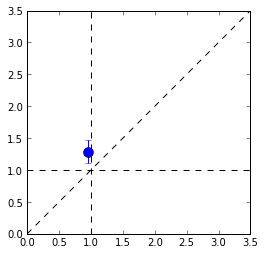

In [31]:
# CV analysis
cv_mean_bef = [np.nanmean(pre_IE50['Before'].loc[i]['raw_amp1'][-30:]) for i in pre_IE50['Before'].index]
cv_mean_aft = [np.nanmean(ave_ptl_2[i, -10:]) * cv_mean_bef[i] for i in range(ave_ptl_2.shape[0])]
               
cv_std_bef = [np.nanstd(pre_IE50['Before'].loc[i]['raw_amp1'][-35:]) for i in pre_IE50['Before'].index]
end_aft = [int(pre_IE50['elimi'].values[i]) for i in range(len(pre_IE50))]
cv_std_aft = [np.nanstd(pre_IE50['After'].loc[i]['raw_amp1'][max(end_aft[k]*3-70,0):end_aft[k]*3]) for k,i in enumerate(pre_IE50['After'].index)]

r = [i ** 2/j ** 2 for i, j in zip([k/m for k, m in zip(cv_std_bef,cv_mean_bef)], [k/m for k, m in zip(cv_std_aft,cv_mean_aft)])]
pi = [i/j for i, j in zip(cv_mean_aft, cv_mean_bef)]


plt.errorbar(np.nanmean(pi), np.nanmean(r), np.nanstd(r)/np.sqrt(len(r)), np.nanstd(pi)/np.sqrt(len(pi)),  'o', markersize=10)

plt.plot(np.arange(0, 4, 0.5),np.arange(0, 4, 0.5), 'k--')
plt.plot(np.arange(0, 4, 0.5), np.ones(8),'k--')
plt.plot(np.ones(8),np.arange(0, 4, 0.5),'k--')
#plt.xlim([0, 3.5])
#plt.ylim([0, 3.5])
plt.axes().set_aspect('equal')
with PdfPages('/data/Figure5_3.pdf') as pdf:
    pdf.savefig()